In [1]:
import sys
import os

import matplotlib.pyplot as plt

from volpy_func_lib import All_tickers

sys.path.append(os.path.abspath(".."))

from load_clean_lib import Option_metrics_path_from_profile

import importlib
import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_returns as orpy
from global_settings import *
import volpy_func_ticker_lib as vtp

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(orpy)
importlib.reload(vtp)

<module 'volpy_func_ticker_lib' from 'D:\\Professionelt\\Code\\volpy\\volpy_func_ticker_lib.py'>

# Create Security mapping

In [5]:
importlib.reload(vp)
# vp.add_calcs_to_files(folder_dir = "Output")

finished with sum1_df from Output


In [4]:
load_clean_lib.Create_Security_map()

# Create EWU_combined 

In [3]:
load_clean_lib.fix_EWU()

D:\Finance Data\OptionMetrics\Tickers\Input\EWU_combined\forward price.csv
D:\Finance Data\OptionMetrics\Tickers\Input\EWU_combined\option data.csv
D:\Finance Data\OptionMetrics\Tickers\Input\EWU_combined\returns and stock price.csv


# Create factor file

In [2]:
load_clean_lib.download_factors()

'SPX' (returns and stock price.csv) fixed — 41 ekstra Bloomberg-dage tilføjet.


## Fix Index CRSP returns (given index data has the right returns from Bloomberg)

In [4]:
importlib.reload(vtp)
vtp.fix_index_returns_bloomberg_OM()

'SPX' (returns and stock price.csv) fixed — 41 ekstra Bloomberg-dage tilføjet.
'NDX' (returns and stock price.csv) fixed — 41 ekstra Bloomberg-dage tilføjet.
'OEX' (returns and stock price.csv) fixed — 41 ekstra Bloomberg-dage tilføjet.
'DJX' (returns and stock price.csv) fixed — 41 ekstra Bloomberg-dage tilføjet.


# Swap rate (sum_df and od_raw)

In [2]:
ticker_list = vp.VIX_tickers                        #vp.All_tickers_original + ["EWU_combined"] #["EWU_combined"] #["AAPL", "BBWI", "HET", "HSH", "APA"] # = vp.All_tickers2_manual,  ["SPX"]
IV_type = "om" # "om"/"bid"/"ask"/"mid" price

importlib.reload(vtp)
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(orpy)

vtp.load_analyze_create_swap_ticker_parallel(
    ticker_list = ticker_list, 
    IV_type=IV_type, 
    safe_slow_IV = False,
    max_max_workers = 3
) # DVN, AMT, OEF

Launching up to 3 parallel workers for 15 tickers…
[%] GLD failed: Due to un-raised error, 1/15 = 6.7% tickers compleated
[✓] IBM, 2/15 = 13.3% tickers compleated
[✓] GS, 3/15 = 20.0% tickers compleated
[%] EFA failed: Due to un-raised error, 4/15 = 26.7% tickers compleated
[%] RUT failed: Due to un-raised error, 5/15 = 33.3% tickers compleated
[✓] GOOG, 6/15 = 40.0% tickers compleated
[✓] AAPL, 7/15 = 46.7% tickers compleated
[✓] AMZN, 8/15 = 53.3% tickers compleated
[✓] DJX, 9/15 = 60.0% tickers compleated
[✓] EEM, 10/15 = 66.7% tickers compleated
[✓] EWZ, 11/15 = 73.3% tickers compleated
[✓] USO, 12/15 = 80.0% tickers compleated
[✓] TLT, 13/15 = 86.7% tickers compleated
[✓] SPX, 14/15 = 93.3% tickers compleated
[✓] NDX, 15/15 = 100.0% tickers compleated
All tickers processed.


# Option Strategies (sum_df_big and df_orpy) straddle, butterfly ect.

In [3]:
price_type = "mid"
IV_type = "om"
OTMs = [0.05, 0.15]

importlib.reload(vtp)
vtp.create_option_sgys_ticker_parallel(
    ticker_list = ["SPX"],
    price_type=price_type, 
    IV_type=IV_type, 
    OTMs=OTMs,
    max_max_workers = 4
)

Launching up to 4 workers for 1 tickers…
[✓] SPX
All option-strategy CSVs created.


In [7]:
vtp.create_csv_from_folder(["sum1", "sum2", "orpy"])

Skipped 35/217 tickers: ['SGP', 'HET', 'EP', 'AVP', 'RSH', 'CGP', 'CMCSK', 'NT', 'NYX', 'PNU', 'HNZ', 'SPY', 'RTN', 'AGN', 'LEH', 'COV', 'MAY', 'CELG', 'MON', 'NDX', 'BDK', 'ONE', 'CSC', 'RAL', 'EMC', 'TOY', 'OEX', 'GBLX', 'OMX', 'UBAN', 'HSH', 'ENE', 'NXTL', 'DJX', 'BHI']
Skipped 35/217 tickers: ['SGP', 'HET', 'EP', 'AVP', 'RSH', 'CGP', 'CMCSK', 'NT', 'NYX', 'PNU', 'HNZ', 'SPY', 'RTN', 'AGN', 'LEH', 'COV', 'MAY', 'CELG', 'MON', 'NDX', 'BDK', 'ONE', 'CSC', 'RAL', 'EMC', 'TOY', 'OEX', 'GBLX', 'OMX', 'UBAN', 'HSH', 'ENE', 'NXTL', 'DJX', 'BHI']
Skipped 35/217 tickers: ['SGP', 'HET', 'EP', 'AVP', 'RSH', 'CGP', 'CMCSK', 'NT', 'NYX', 'PNU', 'HNZ', 'SPY', 'RTN', 'AGN', 'LEH', 'COV', 'MAY', 'CELG', 'MON', 'NDX', 'BDK', 'ONE', 'CSC', 'RAL', 'EMC', 'TOY', 'OEX', 'GBLX', 'OMX', 'UBAN', 'HSH', 'ENE', 'NXTL', 'DJX', 'BHI']


# Now one can get the datasets like this:

In [ ]:
ticker_list = vp.VIX_tickers

# method 1 (fastest i think)
sum1_df = vtp.concat_ticker_datasets(ticker_list, "sum1")
sum2_df = vtp.concat_ticker_datasets(ticker_list, "sum2")
orpy = vtp.concat_ticker_datasets(ticker_list, "orpy")

# method 2 (works using the ticker folders, thus can get od_rdy and od_raw)
ticker_list = ["AA", "IBM"]
od_rdy = vtp.concat_output_ticker_datasets(ticker_list, "od_rdy")
od_raw = vtp.concat_output_ticker_datasets(ticker_list, "od_raw")
sum1_df = vtp.concat_output_ticker_datasets(ticker_list, "sum1_df")
sum2_df = vtp.concat_output_ticker_datasets(ticker_list, "sum2_df")
orpy = vtp.concat_output_ticker_datasets(ticker_list, "df_orpy")

# method 3 (using a precalculated sum1/sum2/orpy)
sum1_df = vtp.draw_ticker_sum_orpy(ticker_list, "sum1")
sum2_df = vtp.draw_ticker_sum_orpy(ticker_list, "sum2")
orpy = vtp.draw_ticker_sum_orpy(ticker_list, "orpy")

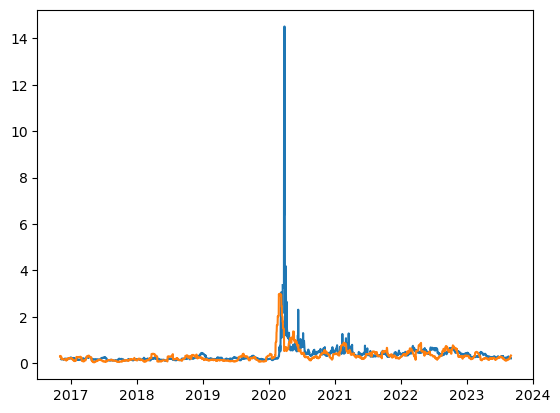

In [63]:
sum1_df = vtp.concat_ticker_datasets(["AA"], "sum1")
from matplotlib import pyplot as plt
plt.plot(sum1_df["date"], sum1_df["SW_0_30"])
plt.plot(sum1_df["date"], sum1_df["RV"])

In [6]:
importlib.reload(vp)
vp.add_calcs_to_files(["orpy", "sum1", "sum2"])

finished with orpy
